I am going to clusterize Argentinian women by demographic data and their knowledge about contraconceptive methods. The data was taken from a survey performed by Indec, which is the Argentinian statistics institute.

Here is the file that helps identifying the columns 
https://www.indec.gob.ar/ftp/cuadros/menusuperior/enssyr/ENSSyR_doc_utilizacion_bases_usuario.pdf

Loading libraries

In [3]:
!pip install savReaderWriter
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import pandas
import savReaderWriter






     |████████████████████████████████| 50.9MB 4.0kB/s eta 0:00:012   |▊                               | 1.2MB 2.3MB/s eta 0:00:22     |█                               | 1.5MB 2.3MB/s eta 0:00:22     |███████████▎                    | 17.9MB 560kB/s eta 0:00:59     |████████████████▎               | 25.9MB 1.4MB/s eta 0:00:18��██▍             | 29.3MB 2.2MB/s eta 0:00:10     |████████████████████▏           | 32.1MB 1.3MB/s eta 0:00:15     |██████████████████████▌         | 35.8MB 1.8MB/s eta 0:00:09█████████████████         | 36.7MB 1.8MB/s eta 0:00:08     |███████████████████████████▌    | 43.7MB 517kB/s eta 0:00:14 1.1MB/s eta 0:00:01ta 0:00:01
  Created wheel for savReaderWriter: filename=savReaderWriter-3.4.2-cp36-none-any.whl size=51143501 sha256=e996df6a5819035ac05fdcedca6d4133d70717e41a97eb0bcd4de1369a75efa9
  Stored in directory: /home/nbuser/.cache/pip/wheels/cc/c5/c2/25171e344dff66668d68736623515b77ecda30dc399270c9ed
Successfully built savReaderWriter
You should consider upg

In [ ]:
Creating dataframe

In [22]:
with savReaderWriter.SavReader('Women_db.sav', ioUtf8 = True,returnHeader=True) as reader:
    df = pandas.DataFrame(reader.all())
print(df)

%matplotlib inline

#df=pd.read_spss('Women_db.sav')



        0       1        2     3     4     5     6     7     8     9    \
0        ID  REGION  PONDERA  CV01  CV02  CV03  CV04  CV05  CV06  CV07   
1     57219       6      600     1     5     1     2     1     1     1   
2     54896       6      600     1     5     1     2     1     1     1   
3     38817       6      100     2     1     2     4     2     2     2   
4     26152       6      222     1     2     1     4     1     1     1   
5     75287       6      222     1     2     1     4     1     1     1   
6     81251       6      151     3     2     1     4     1     1     1   
7     59698       6      149     1     1     2     4     1     1     1   
8     45804       6      149     1     1     2     4     1     1     1   
9     49759       6      370     1     3     2     4     2     1     1   
10    23920       6      370     1     3     2     4     2     1     1   
11    32975       6      964     1     3     2     2     2     2     1   
12    76323       6      964     1    

In [23]:
col=np.array(df.loc[0,:])
df.columns=col

print(df)

         ID  REGION  PONDERA  CV01  CV02  CV03  CV04  CV05  CV06  CV07  \
0        ID  REGION  PONDERA  CV01  CV02  CV03  CV04  CV05  CV06  CV07   
1     57219       6      600     1     5     1     2     1     1     1   
2     54896       6      600     1     5     1     2     1     1     1   
3     38817       6      100     2     1     2     4     2     2     2   
4     26152       6      222     1     2     1     4     1     1     1   
5     75287       6      222     1     2     1     4     1     1     1   
6     81251       6      151     3     2     1     4     1     1     1   
7     59698       6      149     1     1     2     4     1     1     1   
8     45804       6      149     1     1     2     4     1     1     1   
9     49759       6      370     1     3     2     4     2     1     1   
10    23920       6      370     1     3     2     4     2     1     1   
11    32975       6      964     1     3     2     2     2     2     1   
12    76323       6      964     1    

I will analize the dataframe

In [24]:
df=df.drop(df.index[[0]])
print(df)

         ID REGION PONDERA CV01 CV02 CV03 CV04 CV05 CV06 CV07   ...    \
1     57219      6     600    1    5    1    2    1    1    1   ...     
2     54896      6     600    1    5    1    2    1    1    1   ...     
3     38817      6     100    2    1    2    4    2    2    2   ...     
4     26152      6     222    1    2    1    4    1    1    1   ...     
5     75287      6     222    1    2    1    4    1    1    1   ...     
6     81251      6     151    3    2    1    4    1    1    1   ...     
7     59698      6     149    1    1    2    4    1    1    1   ...     
8     45804      6     149    1    1    2    4    1    1    1   ...     
9     49759      6     370    1    3    2    4    2    1    1   ...     
10    23920      6     370    1    3    2    4    2    1    1   ...     
11    32975      6     964    1    3    2    2    2    2    1   ...     
12    76323      6     964    1    3    2    2    2    2    1   ...     
13    49382      6      39    1    4    1    4    1

In [25]:

df.describe()
df.dtypes

ID                  object
REGION              object
PONDERA             object
CV01                object
CV02                object
CV03                object
CV04                object
CV05                object
CV06                object
CV07                object
CV08                object
CV09                object
CV10                object
CV11                object
HO01                object
HO02                object
HO03                object
CANTCOMPONENTES     object
TIPO_H              object
RANGO_INGRESO       object
INGRESO_AGRUPADO    object
EDAD                object
GRUPEDAD            object
PARENTESCO          object
MSEL01              object
MSEL02              object
MSEL03              object
MSEL04              object
MSEL05              object
MSEL06              object
                     ...  
MITS03              object
MITS04              object
MITS05              object
MITS06              object
MITS07              object
MITS08              object
M

I will select the columns that I will use to create the clusters and rename them

In [26]:
df=df[['INGRESO_AGRUPADO','GRUPEDAD','MSEL01','NIVEL_INSTRUCCION_AGRUPADO','COBERTURA_SALUD','MASA01_02','MASA01_03','MASA01_04','MASA01_05']]

#dict_columns={'ingreso_agrupado':'income_range','grupedad':'age_group','msel01':'civil_status',
             # 'nivel_instruccion_agrupado':'education','cobertura_salud':'health_insurance','masa01_02':'knowledge_birth_control_pill',
        #'masa01_03':'knowledge_spiral','masa01_04':'knowledge_preservative','masa01_05':'knowledge_diaphragm'}
df.columns=['income_range','age_group','civil_status','education','health_insurance','knowledge_birth_control_pill',
            'knowledge_spiral','knowledge_preservative','knowledge_diaphragm']
print(df)

     income_range age_group civil_status education health_insurance  \
1               3         3            2         4                1   
2               3         2            6         4                1   
3               1         3            1         1                2   
4               2         1            6         2                1   
5               2         3            2         2                1   
6               1         2            1         4                2   
7               1         1            6         2                2   
8               1         3            3         1                2   
9               1         1            6         2                1   
10              1         4            2         2                1   
11              1         4            2         1                2   
12              1         1            6         2                2   
13              3         4            2         2                1   
14    

I will change the categories so it is more understandable

In [27]:
#for column in df.columns:
 #       df[column] = pd.to_numeric(df[column])
print(df.dtypes)

for col in df.columns:
    df_counts = df[col].value_counts()
    print(df_counts)

income_range                    object
age_group                       object
civil_status                    object
education                       object
health_insurance                object
knowledge_birth_control_pill    object
knowledge_spiral                object
knowledge_preservative          object
knowledge_diaphragm             object
dtype: object
1.0    2446
2.0    1655
9.0     583
3.0     408
Name: income_range, dtype: int64
2.0    1486
3.0    1215
4.0    1209
1.0    1182
Name: age_group, dtype: int64
6.0    2191
1.0    1232
2.0    1212
3.0     358
4.0      60
5.0      39
Name: civil_status, dtype: int64
2.0    1729
4.0    1429
3.0     999
1.0     935
Name: education, dtype: int64
1.0    2855
2.0    2210
9.0      27
Name: health_insurance, dtype: int64
1.0    4760
0.0     332
Name: knowledge_birth_control_pill, dtype: int64
1.0    3000
0.0    2092
Name: knowledge_spiral, dtype: int64
1.0    4258
0.0     834
Name: knowledge_preservative, dtype: int64
0.0    4684
1.0    

In [29]:
code_list = [['income_range', 
              {1 : '0_to_4500', 
               2 : '4500_to_10000', 
               3 : 'more_than_10000', 
               9 : 'does_not_know'}],
            ['age_group',
            {1 : '14_to_19', 
             2 : '20_to_29', 
             3 : '30_to_39', 
             4 : '40_to_49'}],
            ['civil_status',
             {1 : 'united', 
             2 : 'married', 
              3:'split',
             4 : 'divorced', 
             5 : 'widow',
             6:'single'}],
              
              ['education',
             {1 : 'finished_primary_school', 
             2 : 'unfinished_high_school', 
             3 : 'finished_high_school', 
             4 : 'university_or_more'}],
              ['health_insurance',
             {1 : 'covered', 
             2 : 'not_covered', 
             9 : 'does_not_know'}],
             ['knowledge_birth_control_pill',
             {1 : 'yes', 
             0 : 'no'}],
             ['knowledge_spiral',
             {1 : 'yes', 
             0 : 'no'}],
             ['knowledge_preservative',
             {1 : 'yes', 
             0 : 'no'}],
              ['knowledge_diaphragm',
             {1 : 'yes', 
             0 : 'no'}]]
             
for col in code_list:
    columnacodelist=col[0]
    dictio=col[1]
    df[columnacodelist]=[dictio[x] for x in df[columnacodelist]]
                    

In [31]:
print(df)
import csv

import numpy as np
np.savetxt("Modified_df.csv", df, delimiter=",", fmt='%s')

         income_range age_group civil_status                education  \
1     more_than_10000  30_to_39      married       university_or_more   
2     more_than_10000  20_to_29       single       university_or_more   
3           0_to_4500  30_to_39       united  finished_primary_school   
4       4500_to_10000  14_to_19       single   unfinished_high_school   
5       4500_to_10000  30_to_39      married   unfinished_high_school   
6           0_to_4500  20_to_29       united       university_or_more   
7           0_to_4500  14_to_19       single   unfinished_high_school   
8           0_to_4500  30_to_39        split  finished_primary_school   
9           0_to_4500  14_to_19       single   unfinished_high_school   
10          0_to_4500  40_to_49      married   unfinished_high_school   
11          0_to_4500  40_to_49      married  finished_primary_school   
12          0_to_4500  14_to_19       single   unfinished_high_school   
13    more_than_10000  40_to_49      married   unfi

I will analize distributions of the values by using bar charts

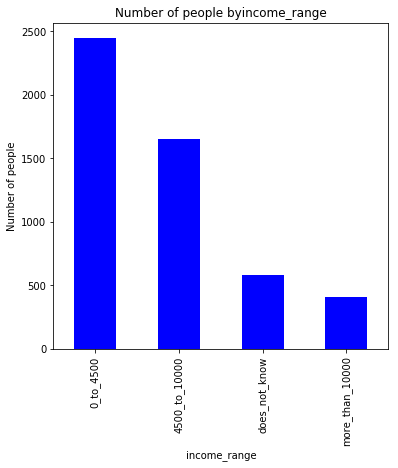

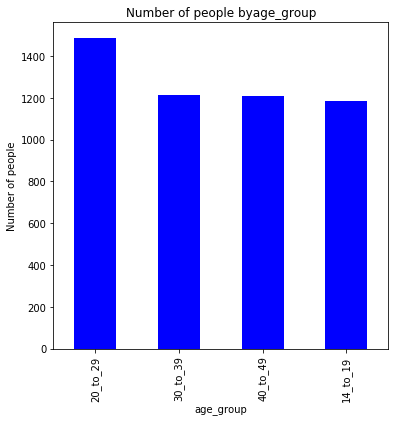

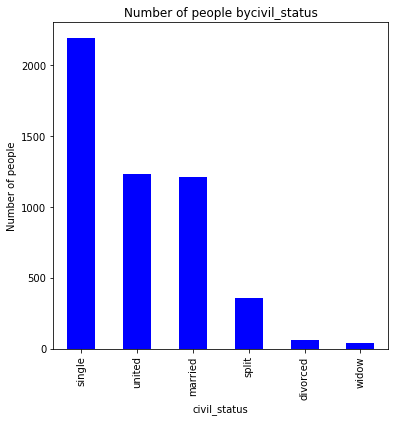

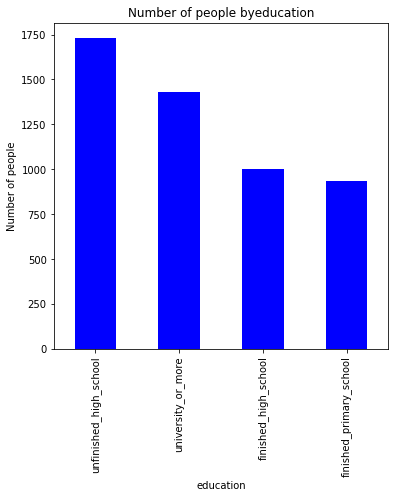

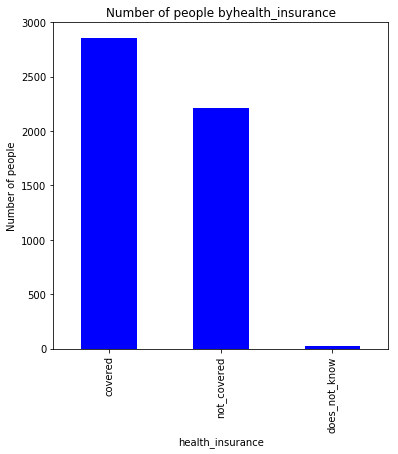

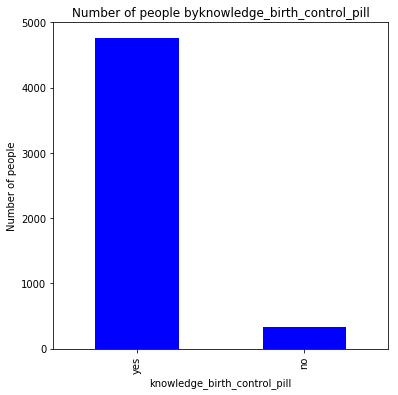

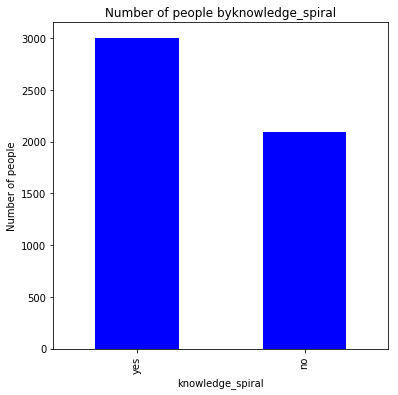

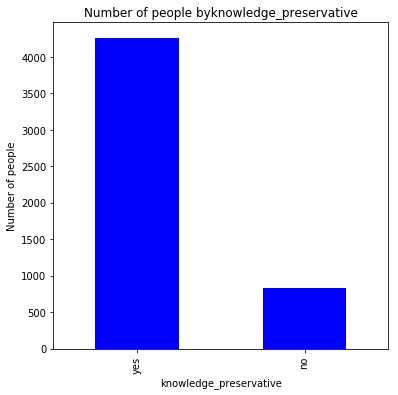

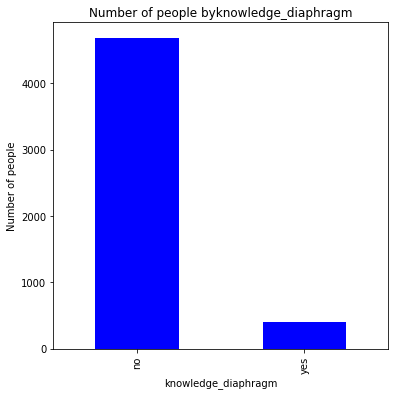

In [32]:
def plot_bars(df, cols):
    for col in cols:
        fig = plt.figure(figsize=(6,6)) # define plot area
        ax = fig.gca() # define axis    
        counts = df[col].value_counts() # find the counts for each unique category
        counts.plot.bar(ax = ax, color = 'blue') # Use the plot.bar method on the counts data frame
        ax.set_title('Number of people by' + col) # Give the plot a main title
        ax.set_xlabel(col) # Set text for the x axis
        ax.set_ylabel('Number of people')# Set text for y axis
        plt.show()

plot_cols = df.columns
plot_bars(df, plot_cols)

I will eliminate the rows where people answered that they dont know.

In [34]:
for column in df.columns:
    df.loc[df[column] == 'does_not_know', column] = np.nan
df.dropna(axis = 0, inplace = True)
df.shape 

for column in df.columns:
    df.loc[df[column] == 'does_not_know', column] = np.nan
df.dropna(axis = 0, inplace = True)
df.shape

(4489, 9)

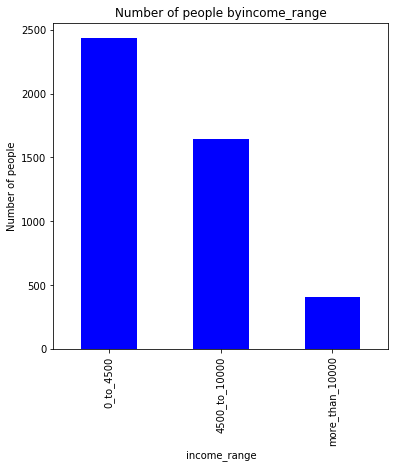

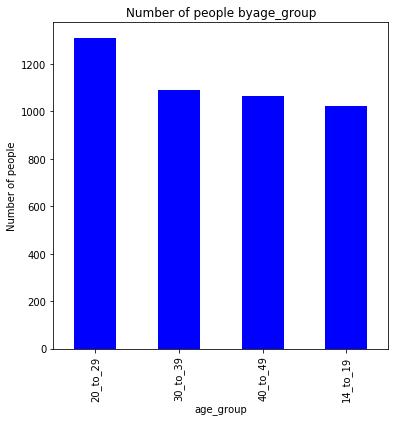

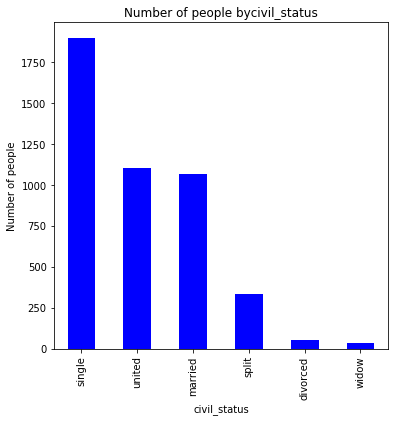

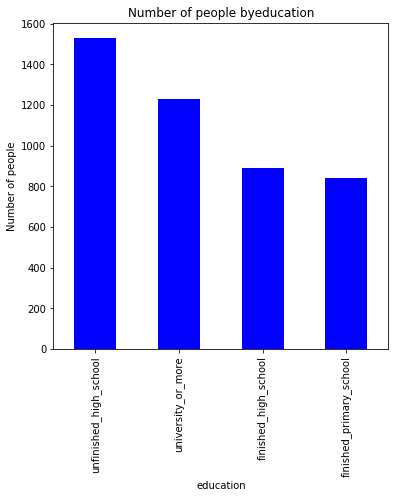

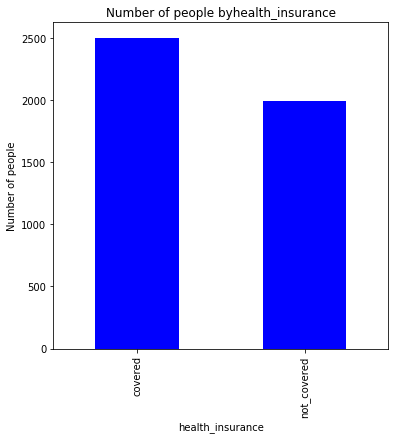

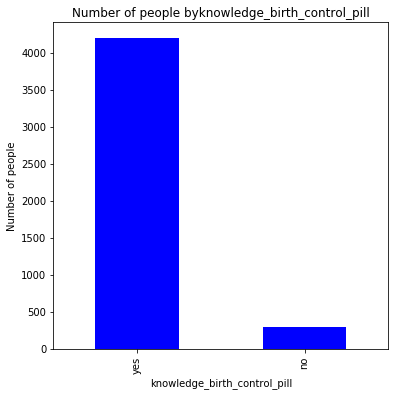

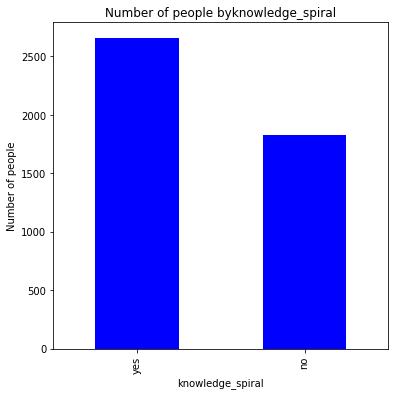

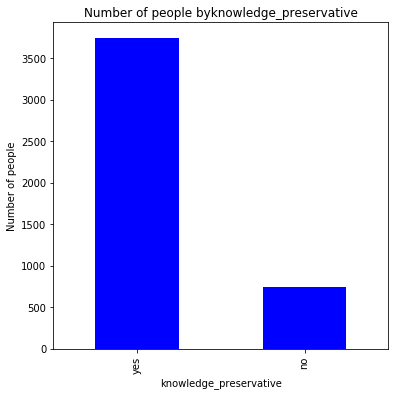

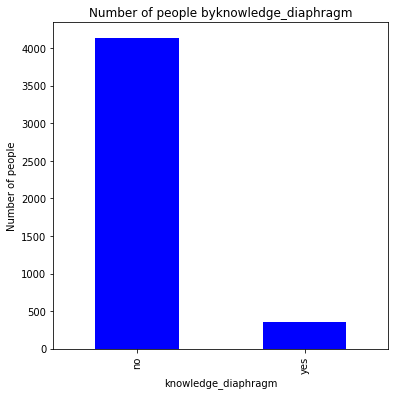

In [43]:
plot_cols = df.columns
plot_bars(df, plot_cols)

There is class imbalance in the income range, so I will group the two sets of recher people. I will group also split, divorced and widow people together to solve the class imbalance in civil_status

In [35]:
income_categories = {'0_to_4500':'0_to_4500', '4500_to_10000':'over_4500', 
                    'more_than_10000':'over_4500'}
df['income_range'] = [income_categories[x] for x in df['income_range']]
df['income_range'].value_counts()


0_to_4500    2434
over_4500    2055
Name: income_range, dtype: int64

In [36]:
civil_status_categories = {'united':'united', 'split':'split_divorced_widow', 'married':'married',
                    'divorced':'split_divorced_widow','single':'single','widow':'split_divorced_widow'}
df['civil_status'] = [civil_status_categories[x] for x in df['civil_status']]
df['civil_status'].value_counts()



single                  1896
united                  1102
married                 1068
split_divorced_widow     423
Name: civil_status, dtype: int64

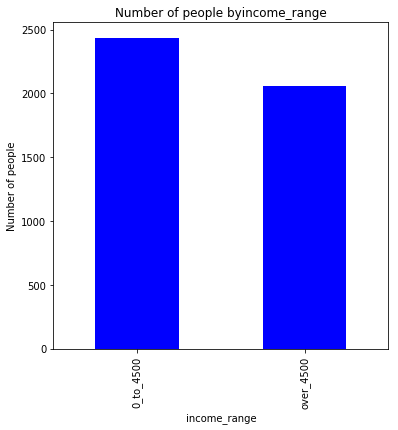

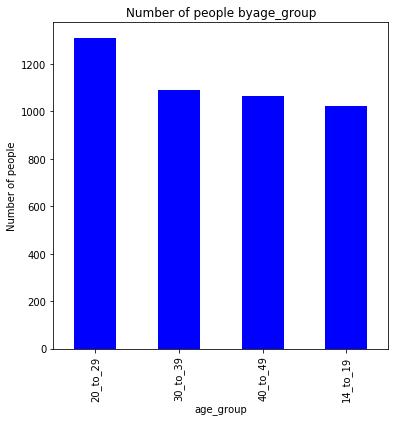

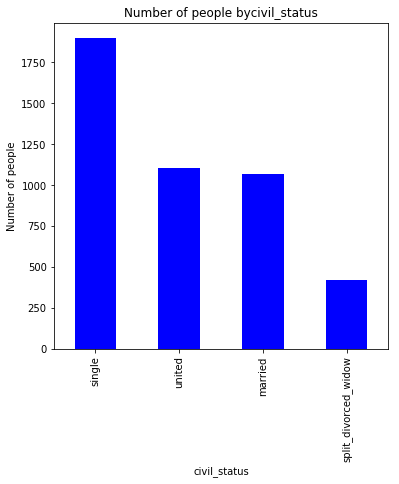

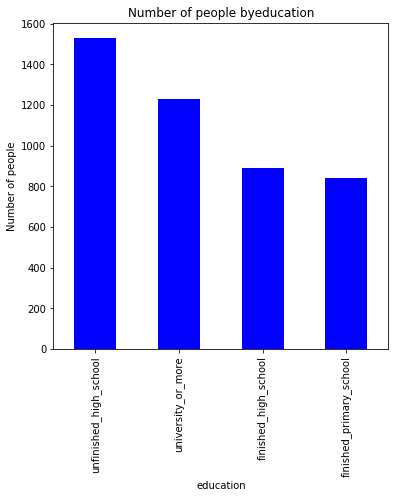

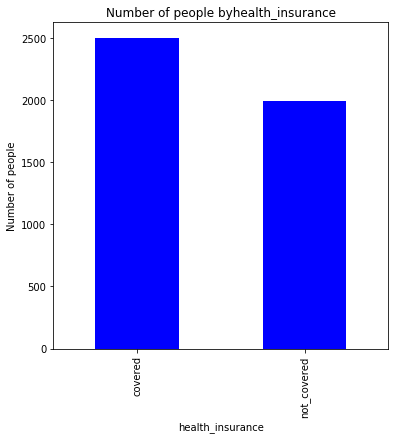

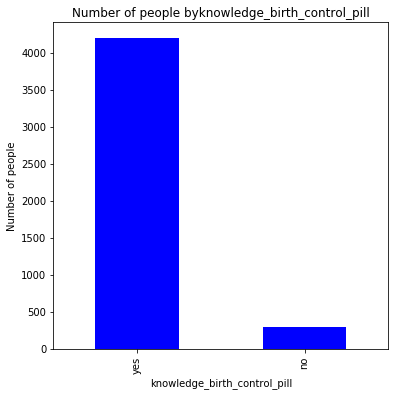

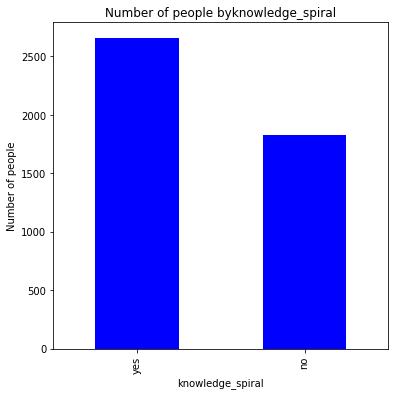

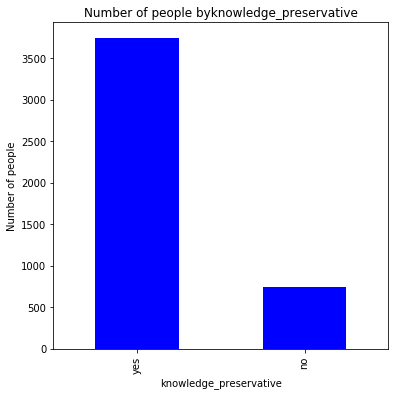

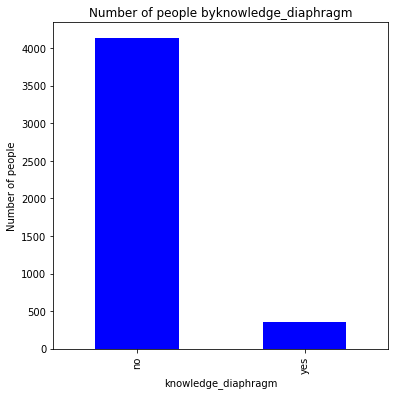

In [47]:
plot_bars(df, plot_cols)

As I have significant class imbalance for the contraconceptive methods variables, I will only analize the the demographic features and the knowledge about spiral 

In [37]:
df=df[['income_range','age_group','civil_status','education','health_insurance',
            'knowledge_spiral']]
print(df)

     income_range age_group          civil_status                education  \
1       over_4500  30_to_39               married       university_or_more   
2       over_4500  20_to_29                single       university_or_more   
3       0_to_4500  30_to_39                united  finished_primary_school   
4       over_4500  14_to_19                single   unfinished_high_school   
5       over_4500  30_to_39               married   unfinished_high_school   
6       0_to_4500  20_to_29                united       university_or_more   
7       0_to_4500  14_to_19                single   unfinished_high_school   
8       0_to_4500  30_to_39  split_divorced_widow  finished_primary_school   
9       0_to_4500  14_to_19                single   unfinished_high_school   
10      0_to_4500  40_to_49               married   unfinished_high_school   
11      0_to_4500  40_to_49               married  finished_primary_school   
12      0_to_4500  14_to_19                single   unfinished_h

I need to convert the variables into dummy

In [38]:
from sklearn import preprocessing

categorical_columns = ['age_group','civil_status','education','health_insurance',
            'knowledge_spiral']
Features = df['income_range']
enc = preprocessing.LabelEncoder()
enc.fit(Features)
Features = enc.transform(Features)
ohe = preprocessing.OneHotEncoder()
encoded = ohe.fit(Features.reshape(-1,1))
Features = encoded.transform(Features.reshape(-1,1)).toarray()

def encode_string(cat_feature):
    ## First encode the strings to numeric categories
    enc = preprocessing.LabelEncoder()
    enc.fit(cat_feature)
    enc_cat_feature = enc.transform(cat_feature)
    ## Now, apply one hot encoding
    ohe = preprocessing.OneHotEncoder()
    encoded = ohe.fit(enc_cat_feature.reshape(-1,1))
    return encoded.transform(enc_cat_feature.reshape(-1,1)).toarray()
    

for col in categorical_columns:
    temp = encode_string(df[col])
    Features = np.concatenate([Features, temp], axis = 1)

print(Features.shape)
print(Features[:2, :])
import csv

import numpy as np
np.savetxt("Features.csv", Features, delimiter=",", fmt='%s')

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/sklearn/preprocessing/_encoders.py:371: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
/home/nbuser/anaconda3_501/lib/python3.6/site-packages/sklearn/preprocessing/_encoders.py:371: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories

(4489, 18)
[[0. 1. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 1.]
 [0. 1. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 1. 0. 0. 1.]]


I will create a K mean model

In [39]:
import pandas as pd
import numpy as np
import numpy.random as nr
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

%matplotlib inline

nr.seed(2233)
col_dic = {0:'blue',1:'green',2:'orange',3:'gray',4:'magenta',5:'black'}
kmeans_2 = KMeans(n_clusters=2, random_state=0)
assignments_km2 = kmeans_2.fit_predict(Features)
assign_color_km2 = [col_dic[x] for x in assignments_km2]

In [40]:
df['results_km2']=assignments_km2
print(df)


     income_range age_group          civil_status                education  \
1       over_4500  30_to_39               married       university_or_more   
2       over_4500  20_to_29                single       university_or_more   
3       0_to_4500  30_to_39                united  finished_primary_school   
4       over_4500  14_to_19                single   unfinished_high_school   
5       over_4500  30_to_39               married   unfinished_high_school   
6       0_to_4500  20_to_29                united       university_or_more   
7       0_to_4500  14_to_19                single   unfinished_high_school   
8       0_to_4500  30_to_39  split_divorced_widow  finished_primary_school   
9       0_to_4500  14_to_19                single   unfinished_high_school   
10      0_to_4500  40_to_49               married   unfinished_high_school   
11      0_to_4500  40_to_49               married  finished_primary_school   
12      0_to_4500  14_to_19                single   unfinished_h

age_group


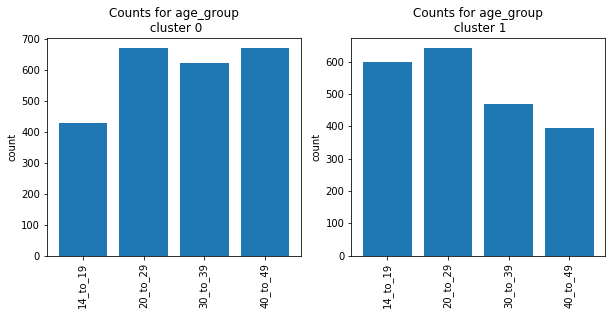

civil_status


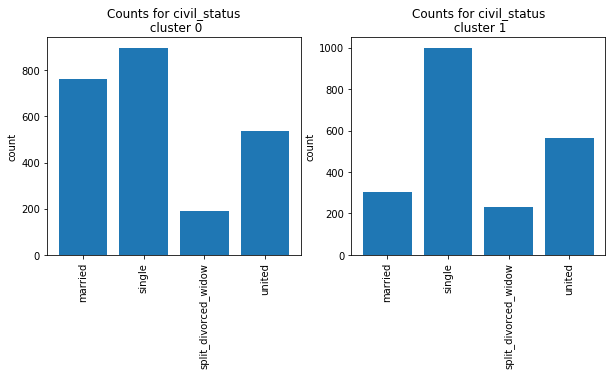

education


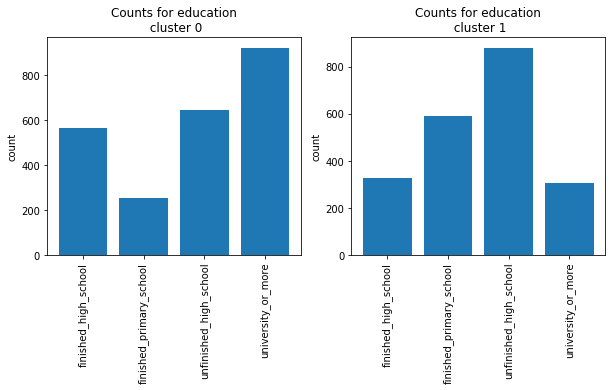

health_insurance


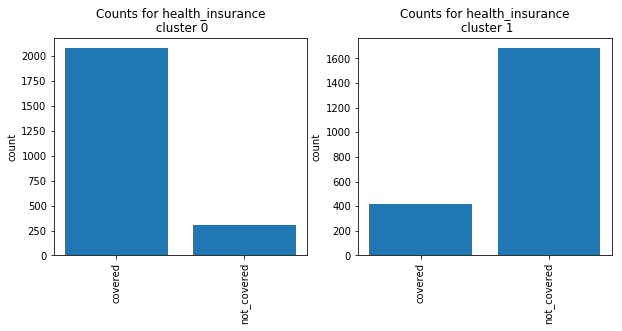

knowledge_spiral


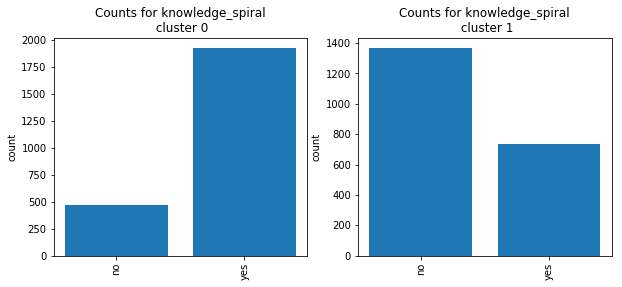

In [42]:
import numpy as np
cat_cols = ['age_group','civil_status','education','health_insurance',
            'knowledge_spiral']

df['dummy'] = np.ones(shape = df.shape[0])
for col in cat_cols:
    print(col)
    counts = df[['dummy', 'results_km2', col]].groupby(['results_km2', col], as_index = False).count()
    temp = counts[counts['results_km2'] == 0][[col, 'dummy']]
    _ = plt.figure(figsize = (10,4))
    plt.subplot(1, 2, 1)
    temp = counts[counts['results_km2'] == 0][[col, 'dummy']]
    plt.bar(temp[col], temp.dummy)
    plt.xticks(rotation=90)
    plt.title('Counts for ' + col + '\n cluster 0')
    plt.ylabel('count')
    plt.subplot(1, 2, 2)
    temp = counts[counts['results_km2'] == 1][[col, 'dummy']]
    plt.bar(temp[col], temp.dummy)
    plt.xticks(rotation=90)
    plt.title('Counts for ' + col + '\n cluster 1')
    plt.ylabel('count')
    plt.show()

Cluster 0 are mostly people that ae older than cluster 1, have more proportion of marriages, have higher education, most of them have health insurance coverage and most of them know about spiral contraconceptive method.

Now I will try with three clusters




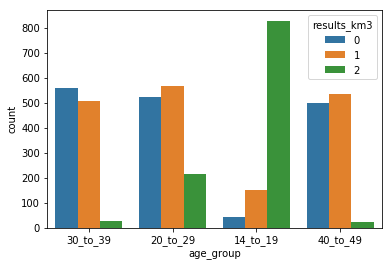

In [54]:
kmeans_3 = KMeans(n_clusters=3, random_state=0)
assignments_km3 = kmeans_3.fit_predict(Features)
assign_color_km3 = [col_dic[x] for x in assignments_km3]

df['results_km3']=assignments_km3

import seaborn as sns

#'age_group','civil_status','education','health_insurance',
 #           'knowledge_spiral'

ax = sns.countplot(x='age_group', hue="results_km3", data=df)



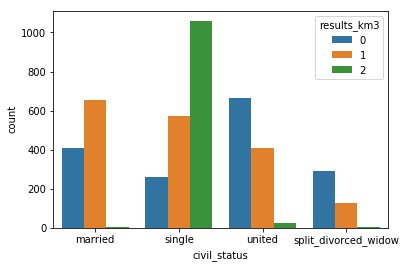

In [53]:
ax1 = sns.countplot(x='civil_status', hue="results_km3", data=df)

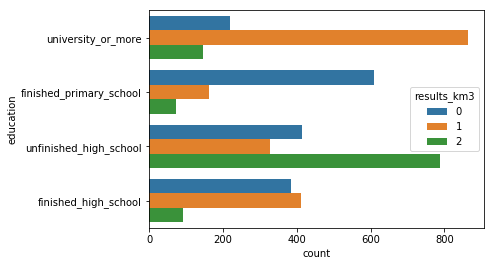

In [68]:
ax2 = sns.countplot(y='education', hue="results_km3", data=df)



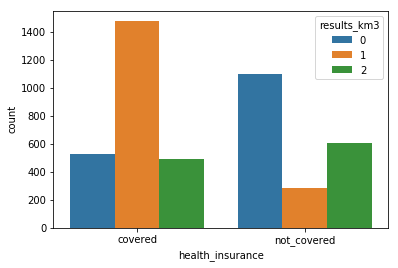

In [56]:
ax3 = sns.countplot(x='health_insurance', hue="results_km3", data=df)

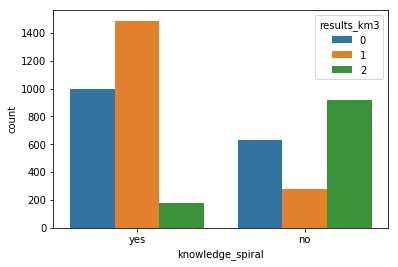

In [57]:
ax4 = sns.countplot(x='knowledge_spiral', hue="results_km3", data=df)

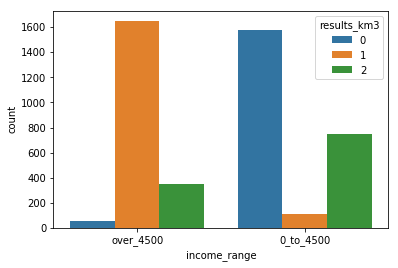

In [69]:
ax5 = sns.countplot(x='income_range', hue="results_km3", data=df)

Cluster 0 is mostly people over 20 years old,with a low income, not single, with education equal or lower than having finished high school, most of them arent covered by health insurance and the majority knows about spiral method.

Cluster 1 is mostly people over 20, with a high income,  with any civil status, highly educated, covered by health insurance and mostly knows about spiral method (even more than clusted 0)

Cluster 2 are young people (less than 20), mostly with low income, single, with unfinished high school, half are covered and half arent covered by health insurance and mostly they dont know about spiral

I will make more models with more clusters and evaluate them by WCSS and BCSS

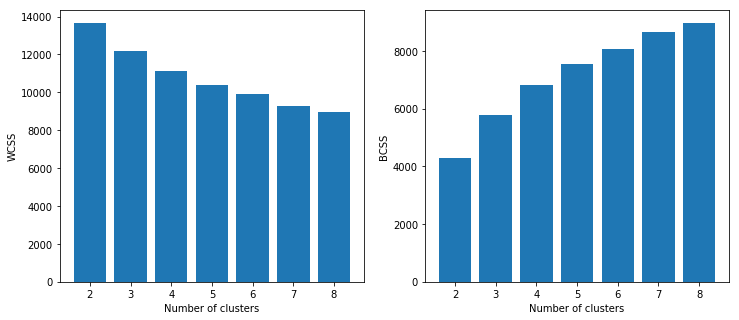

In [72]:
kmeans_4 = KMeans(n_clusters=4, random_state=0)
assignments_km4 = kmeans_4.fit_predict(Features)

kmeans_5 = KMeans(n_clusters=5, random_state=0)
assignments_km5 = kmeans_5.fit_predict(Features)

kmeans_6 = KMeans(n_clusters=6, random_state=0)
assignments_km6 = kmeans_6.fit_predict(Features)

kmeans_7 = KMeans(n_clusters=7, random_state=0)
assignments_km7 = kmeans_7.fit_predict(Features)

kmeans_8 = KMeans(n_clusters=8, random_state=0)
assignments_km8 = kmeans_8.fit_predict(Features)


km_models = [kmeans_2, kmeans_3, kmeans_4, kmeans_5, kmeans_6,kmeans_7, kmeans_8]

def plot_WCSS_km(km_models, samples):
    fig, ax = plt.subplots(1, 2, figsize=(12,5))
    
    ## Plot WCSS
    wcss = [mod.inertia_ for mod in km_models]
    n_clusts = range(2,len(wcss) + 2)
    ax[0].bar(n_clusts, wcss)
    ax[0].set_xlabel('Number of clusters')
    ax[0].set_ylabel('WCSS')
    
    ## Plot BCSS
    ## Compute BCSS as TSS - WCSS 
    n_1 = (float(samples.shape[0]) * float(samples.shape[1])) - 1.0
    tss = n_1 * np.var(samples)
    bcss = [tss - x for x in wcss]
    ax[1].bar(n_clusts, bcss)
    ax[1].set_xlabel('Number of clusters')
    ax[1].set_ylabel('BCSS')
    plt.show()
    

plot_WCSS_km(km_models, Features)

Is seems that a model with 8 clusters is the most convenient as it has the least WCSS and the highest BCSS. Now I will evaluate the Sillohette coefficient

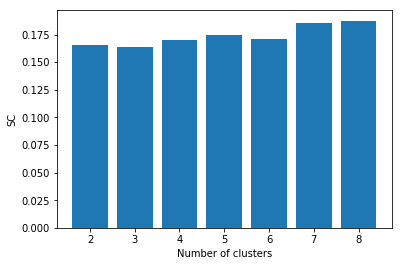

In [73]:
assignment_list = [assignments_km2, assignments_km3, assignments_km4, assignments_km5, assignments_km6, assignments_km7, assignments_km8]

def plot_sillohette(samples, assignments, x_lab = 'Number of clusters'):
    silhouette = [silhouette_score(samples, a) for a in assignments]
    n_clusts = range(2, len(silhouette) + 2)
    plt.bar(n_clusts, silhouette)
    plt.xlabel(x_lab)
    plt.ylabel('SC')
    plt.show()

plot_sillohette(Features, assignment_list)

The Sillohette coefficient is small for each model and doesnt vary that much.

I will make the plots to analize the 8 clusters model

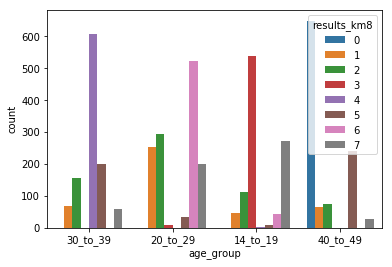

In [74]:
df['results_km8']=assignments_km8
ax = sns.countplot(x='age_group', hue="results_km8", data=df)

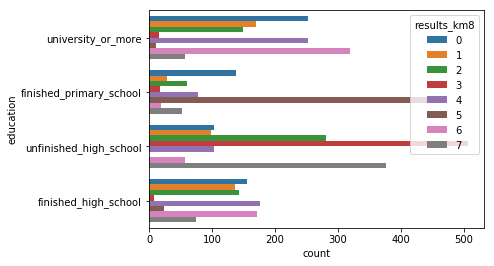

In [75]:
ax2 = sns.countplot(y='education', hue="results_km8", data=df)

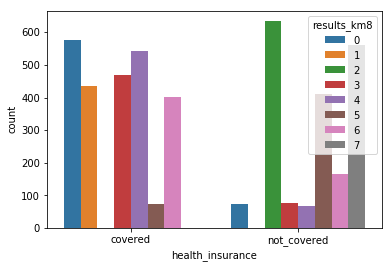

In [76]:
ax3 = sns.countplot(x='health_insurance', hue="results_km8", data=df)

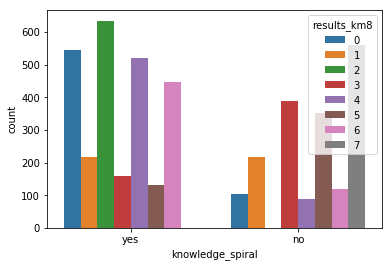

In [77]:
ax4 = sns.countplot(x='knowledge_spiral', hue="results_km8", data=df)

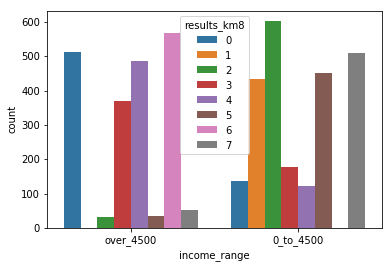

In [78]:
ax5 = sns.countplot(x='income_range', hue="results_km8", data=df)

Cluster 0: Mostly rich women with knowledge about spiral, covered by health insurance, with undefined educational profile, from 40 to 40 years old

Cluster 1: Rich women, half of them knows about spiral and half dont, covered by health insurance, most of them finished high school or attended to university, and are between 20 to 29 years old.

Cluster 2: poor women with knowledge about spiral, not covered by health insurance with education equal or higher than high school between 20 and 39 years old.

Cluster 3: mostly rich women with no knowledge about spiral, covered by health insurance with unfinished high school between 14 and 19 years old.

Cluster 4: rich women with knowledge about spiral, covered by health insurance with high education (finished high school or university) between 30 and 39 years old.

Cluster 5: poor women with no knowledge about spiral, not covered by health insurance that only finished primary school between 30 and 49 years old.

Cluster 6: rich women with knowledge about spiral, covered by health insurance with education equal or higher than finished high school between 20 and 29 years old.

Cluster 7: poor women with no knowledge about spiral, not covered by health insurance with unfinished high school between 14 and 19 years old.